# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations from the data:
NOTE: Observations based off of weather query requested at 19:20 PM EST on 5/23/2020.

1. On the plot describing City Latitude vs. Max Temperature, it could be seen that temperatures were maximized at a latitude of approximately zero.  Temperatures would then decrease as the absolute value of the latitude increased (the cities farther away from latitude zero).  This makes sense with expectations because a latitude of zero represents the equator, which is understood to be (on the whole) the warmest location on Earth.  We would expect that the further one is from the equator and closer to the poles (very positive latitude for the North Pole, and very negative latitude for the South Pole), the max daily temperatures would decrease, a trend that is observed in the data.

2.  As can be seen on the plot describing City Latitude vs. Humidity, it can be seen that there is not a lot of correlation between the data.  However, when looking at the data surrounding the equator (latitudes close to zero), the humidity was always above 60%.  This suggests that climates closer to the equator are generally more humid than those in the regions further away from the equator.

3. There do not appear to be strong correlations between cloud cover and proximity to the equator or wind speed and proximity to the equator.  Although both increase slightly as you approach the equator, these results will likely change daily, as weather patterns are still very difficult to predict.

In [1]:
#!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_CJM.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

counter = 1
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q=" + str(city)
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(city)
        print(f'Processing Record {counter} | City Checked: {city}')
        counter += 1
    except KeyError:
        print(f'No record for city {city}. Skipping.')

Processing Record 1 | City Checked: port alfred
Processing Record 2 | City Checked: bethel
Processing Record 3 | City Checked: mahebourg
Processing Record 4 | City Checked: bathsheba
Processing Record 5 | City Checked: kapaa
Processing Record 6 | City Checked: gat
Processing Record 7 | City Checked: evanston
Processing Record 8 | City Checked: oak ridge
Processing Record 9 | City Checked: la grande
Processing Record 10 | City Checked: thompson
Processing Record 11 | City Checked: saint-philippe
Processing Record 12 | City Checked: san quintin
Processing Record 13 | City Checked: dniprovka
Processing Record 14 | City Checked: kara-tyube
Processing Record 15 | City Checked: cape town
Processing Record 16 | City Checked: sept-iles
Processing Record 17 | City Checked: hilo
Processing Record 18 | City Checked: huarmey
Processing Record 19 | City Checked: busselton
Processing Record 20 | City Checked: ribeira grande
Processing Record 21 | City Checked: bredasdorp
Processing Record 22 | City 

Processing Record 164 | City Checked: tulum
Processing Record 165 | City Checked: mitsamiouli
Processing Record 166 | City Checked: ada
Processing Record 167 | City Checked: la rioja
No record for city amderma. Skipping.
Processing Record 168 | City Checked: belmonte
Processing Record 169 | City Checked: le passage
Processing Record 170 | City Checked: udachnyy
Processing Record 171 | City Checked: bumba
Processing Record 172 | City Checked: naze
Processing Record 173 | City Checked: luderitz
Processing Record 174 | City Checked: oranjemund
Processing Record 175 | City Checked: kilinochchi
Processing Record 176 | City Checked: bella union
Processing Record 177 | City Checked: sabla
Processing Record 178 | City Checked: stutterheim
Processing Record 179 | City Checked: broome
Processing Record 180 | City Checked: saint-leu
No record for city tuggurt. Skipping.
Processing Record 181 | City Checked: chapleau
No record for city grand river south east. Skipping.
No record for city khonuu. S

Processing Record 330 | City Checked: auki
Processing Record 331 | City Checked: babu
Processing Record 332 | City Checked: lima
No record for city cheuskiny. Skipping.
Processing Record 333 | City Checked: grand forks
Processing Record 334 | City Checked: banda aceh
Processing Record 335 | City Checked: abu kamal
Processing Record 336 | City Checked: coihaique
Processing Record 337 | City Checked: voyvozh
Processing Record 338 | City Checked: mananara
No record for city tsihombe. Skipping.
Processing Record 339 | City Checked: sao joao da barra
Processing Record 340 | City Checked: suda
Processing Record 341 | City Checked: port hedland
Processing Record 342 | City Checked: valparaiso
Processing Record 343 | City Checked: clyde river
Processing Record 344 | City Checked: sanming
Processing Record 345 | City Checked: sechura
Processing Record 346 | City Checked: hofn
Processing Record 347 | City Checked: banjar
Processing Record 348 | City Checked: castro
Processing Record 349 | City C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City': name, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity,
                           'Cloudiness': cloudiness, 'Wind': wind, 'Country': country, 'Date': date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,port alfred,-33.59,26.89,59.00,83,0,1.99,ZA,1590275891
1,bethel,41.37,-73.41,57.00,82,90,9.17,US,1590275480
2,mahebourg,-20.41,57.70,68.00,88,20,2.24,MU,1590275891
3,bathsheba,13.22,-59.52,82.40,69,20,14.99,BB,1590275891
4,kapaa,22.08,-159.32,81.00,78,40,10.29,US,1590275891
...,...,...,...,...,...,...,...,...,...
547,wicklow,53.00,-6.42,53.01,93,75,19.46,IE,1590275923
548,ouesso,1.61,16.05,72.03,96,4,1.43,CG,1590275923
549,polunochnoye,60.87,60.42,40.86,95,0,1.21,RU,1590275923
550,sindal,57.47,10.20,51.01,85,63,4.00,DK,1590275923


In [5]:
weather_df.to_csv(output_data_file, index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

#No values over 100% humidity, so I will skip this section

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.959076,17.075362,65.327101,70.010870,50.300725,8.089076,1.590276e+09
std,32.786814,90.076465,15.398722,21.805273,37.515734,5.930037,6.947485e+01
min,-54.800000,-175.200000,26.600000,1.000000,0.000000,0.130000,1.590275e+09
25%,-7.007500,-63.665000,53.010000,59.000000,14.000000,3.547500,1.590276e+09
50%,23.130000,22.940000,67.120000,76.000000,47.000000,6.710000,1.590276e+09
75%,46.642500,98.965000,78.800000,87.000000,89.250000,10.925000,1.590276e+09
max,78.220000,179.320000,95.090000,100.000000,100.000000,34.720000,1.590276e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

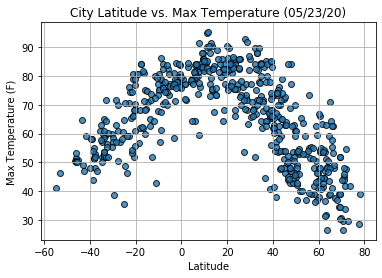

In [27]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor = 'black', alpha = 0.8, label = 'Cities')
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig1_CJM.png")
plt.show()

## Latitude vs. Humidity Plot

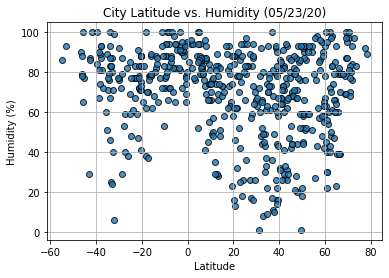

In [28]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Cities')
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig2_CJM.png")
plt.show()

## Latitude vs. Cloudiness Plot

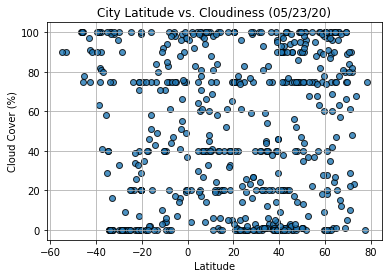

In [29]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Cities')
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig3_CJM.png")
plt.show()

## Latitude vs. Wind Speed Plot

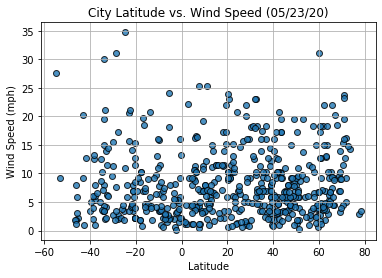

In [30]:
plt.scatter(weather_df['Lat'], weather_df['Wind'], edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Cities')
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig4_CJM.png")
plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x,y,title,y_label,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f'The r-squared value is {rvalue}')
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Lat'] >= 0, :]
southern_df = weather_df.loc[weather_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is -0.805665168872988


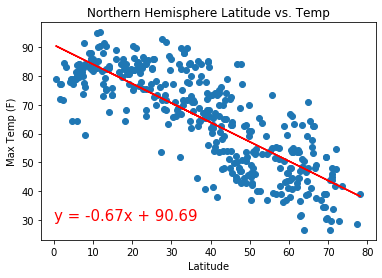

In [51]:
x = northern_df['Lat']
y = northern_df['Max Temp']
regression(x,y,'Northern Hemisphere Latitude vs. Temp', 'Max Temp (F)', (0,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7603701863848189


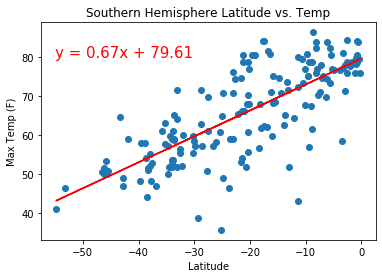

In [52]:
x = southern_df['Lat']
y = southern_df['Max Temp']
regression(x,y,'Southern Hemisphere Latitude vs. Temp', 'Max Temp (F)', (-55,80))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is -0.01651573391790613


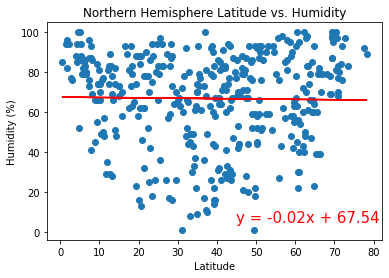

In [53]:
x = northern_df['Lat']
y = northern_df['Humidity']
regression(x,y,'Northern Hemisphere Latitude vs. Humidity', 'Humidity (%)', (45,5))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.1731780497641803


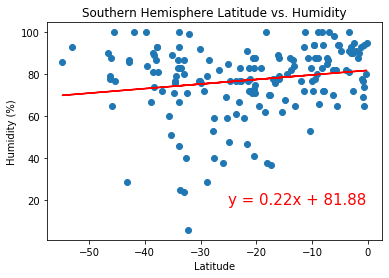

In [54]:
x = southern_df['Lat']
y = southern_df['Humidity']
regression(x,y,'Southern Hemisphere Latitude vs. Humidity', 'Humidity (%)', (-25,18))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.10999729533829648


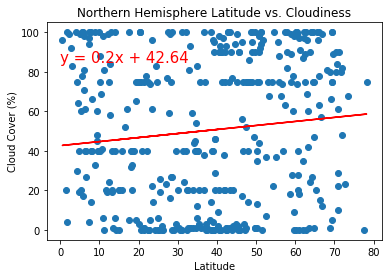

In [55]:
x = northern_df['Lat']
y = northern_df['Cloudiness']
regression(x,y,'Northern Hemisphere Latitude vs. Cloudiness', 'Cloud Cover (%)', (0,85))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is -0.11074793318467746


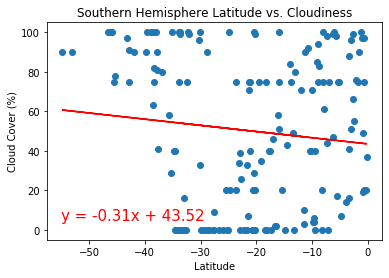

In [56]:
x = southern_df['Lat']
y = southern_df['Cloudiness']
regression(x,y,'Southern Hemisphere Latitude vs. Cloudiness', 'Cloud Cover (%)', (-55,5))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.05299321981533371


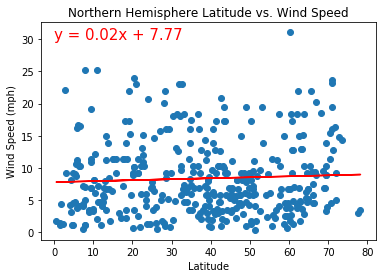

In [57]:
x = northern_df['Lat']
y = northern_df['Wind']
regression(x,y,'Northern Hemisphere Latitude vs. Wind Speed', 'Wind Speed (mph)', (0,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is -0.1461444486197362


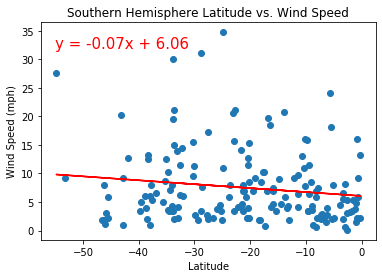

In [58]:
x = southern_df['Lat']
y = southern_df['Wind']
regression(x,y,'Southern Hemisphere Latitude vs. Wind Speed', 'Wind Speed (mph)', (-55,32))